# IMDB Movie Review Sentiment Analysis

## Classification

#### Table of Contents

- [Library Imports](#Library-Imports)
- [Data Reading](#Data-Reading)
- [Data Splitting](#Data-Splitting)
- [Text Data Vectorization](#Text-Data-Vectorization)
- [Model Metrics](#Model-Metrics)
- [Model Training & Validation](#Model-Training-&-Validation)
- [Hyper Parameter Tuning](#Hyper-Parameter-Tuning)
- [Model Testing](#Model-Testing)

#### Library Imports

In [16]:
import pickle
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

#### Data Reading

In [2]:
mov_reviews = pd.read_pickle('Data/movie_reviews_cleaned_spacy.pkl')

#### Data Splitting

In [3]:
X = mov_reviews.clean_review
y = mov_reviews.sentiment

In [4]:
X_rem, X_train, y_rem, y_train = train_test_split(X, y, test_size=.90, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=.5, random_state=42)

#### Text Data Vectorization

In [5]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_valid_tfidf = tfidf.transform(X_valid)

#### Model Metrics

In [48]:
def model_metrics(model_name, y_train, y_pred_train, y, y_pred, test=False, save=False):
    
    if test:
        split_name = 'Testing'
    else:
        split_name = 'Validation'
    
    # save accuracy of each set 
    train_accu = classification_report(y_train, y_pred_train, output_dict=True)['accuracy'] * 100
    val_test_accu = classification_report(y, y_pred, output_dict=True)['accuracy'] * 100
        
    # print classification report (accuracy, f1, recall, precision) of each set
    print('Training Scores:\n\n', classification_report(y_train, y_pred_train), '_'*53, '\n')
    print(f'{split_name} Scores:\n\n', classification_report(y, y_pred), '_'*53, '\n')
        
    # print difference between training and validation/test
    print(f'Training/{split_name} Difference:', train_accu - val_test_accu, '\n')
        
    # save confusion matrix of each set
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_val_test = confusion_matrix(y, y_pred)
    
    # plot heatmap of each set
    fig, ax = plt.subplots(1, 2, figsize=[12, 4])
    plt.suptitle(f'{model_name} Confusion Matrices')
    cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)
    labels = ['Positive', 'Negative']
    sns.heatmap(cm_train, annot=True, fmt='d', linewidths=.5, ax=ax[0], cmap=cmap, xticklabels=labels, yticklabels=labels).set_title('Training')
    sns.heatmap(cm_val_test, annot=True, fmt='d', linewidths=.5, ax=ax[1], cmap=cmap, xticklabels=labels, yticklabels=labels).set_title(f'{split_name}')
    
    if save:
        plt.savefig(f'Images/{model_name} confusion matrices.png', bbox_inches='tight', transparent=True)

#### Model Training & Validation

- k-Nearest Neighbors

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [8]:
y_pred_train = knn.predict(X_train_tfidf)
y_pred = knn.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       0.87      0.51      0.65     96750
    positive       0.68      0.93      0.79    108822

    accuracy                           0.73    205572
   macro avg       0.78      0.72      0.72    205572
weighted avg       0.77      0.73      0.72    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.54      0.21      0.30      5375
    positive       0.54      0.84      0.66      6045

    accuracy                           0.54     11420
   macro avg       0.54      0.52      0.48     11420
weighted avg       0.54      0.54      0.49     11420
 _____________________________________________________ 

Training/Validation Difference: 19.154109078004495 



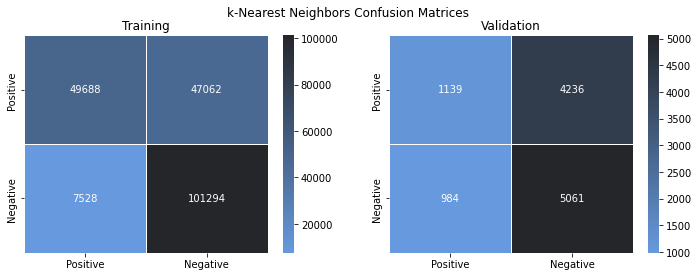

In [9]:
model_metrics('k-Nearest Neighbors', y_train, y_pred_train, y_valid, y_pred, test=False)

- Logistic Regression

In [10]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=150)

In [11]:
y_pred_train = logreg.predict(X_train_tfidf)
y_pred = logreg.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       0.93      0.92      0.92     96750
    positive       0.93      0.94      0.93    108822

    accuracy                           0.93    205572
   macro avg       0.93      0.93      0.93    205572
weighted avg       0.93      0.93      0.93    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.92      0.89      0.91      5375
    positive       0.91      0.93      0.92      6045

    accuracy                           0.92     11420
   macro avg       0.92      0.91      0.91     11420
weighted avg       0.92      0.92      0.92     11420
 _____________________________________________________ 

Training/Validation Difference: 1.2341248133481173 



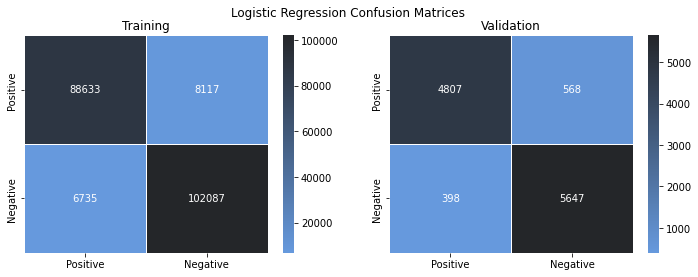

In [12]:
model_metrics('Logistic Regression', y_train, y_pred_train, y_valid, y_pred, test=False)

- Decision Tree

In [13]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [14]:
y_pred_train = dtc.predict(X_train_tfidf)
y_pred = dtc.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       1.00      1.00      1.00     96750
    positive       1.00      1.00      1.00    108822

    accuracy                           1.00    205572
   macro avg       1.00      1.00      1.00    205572
weighted avg       1.00      1.00      1.00    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.74      0.74      0.74      5375
    positive       0.77      0.77      0.77      6045

    accuracy                           0.76     11420
   macro avg       0.76      0.76      0.76     11420
weighted avg       0.76      0.76      0.76     11420
 _____________________________________________________ 

Training/Validation Difference: 24.09564131731298 



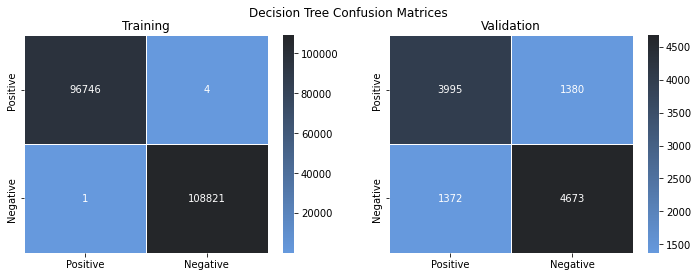

In [15]:
model_metrics('Decision Tree', y_train, y_pred_train, y_valid, y_pred, test=False)

- Random Forest

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [17]:
y_pred_train = rfc.predict(X_train_tfidf)
y_pred = rfc.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       1.00      1.00      1.00     96750
    positive       1.00      1.00      1.00    108822

    accuracy                           1.00    205572
   macro avg       1.00      1.00      1.00    205572
weighted avg       1.00      1.00      1.00    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.89      0.86      0.87      5375
    positive       0.88      0.91      0.89      6045

    accuracy                           0.88     11420
   macro avg       0.88      0.88      0.88     11420
weighted avg       0.88      0.88      0.88     11420
 _____________________________________________________ 

Training/Validation Difference: 11.696341842707028 



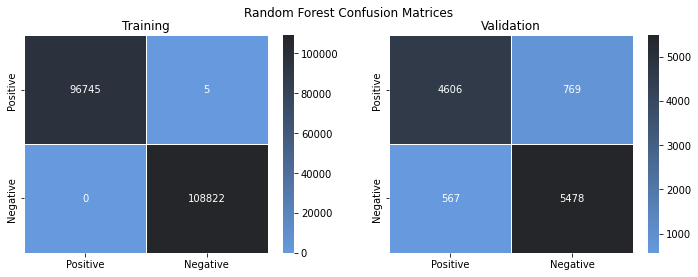

In [18]:
model_metrics('Random Forest', y_train, y_pred_train, y_valid, y_pred, test=False)

- Extra Trees

In [19]:
etc = ExtraTreesClassifier()
etc.fit(X_train_tfidf, y_train)

ExtraTreesClassifier()

In [20]:
y_pred_train = etc.predict(X_train_tfidf)
y_pred = etc.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       1.00      1.00      1.00     96750
    positive       1.00      1.00      1.00    108822

    accuracy                           1.00    205572
   macro avg       1.00      1.00      1.00    205572
weighted avg       1.00      1.00      1.00    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      5375
    positive       0.89      0.92      0.90      6045

    accuracy                           0.89     11420
   macro avg       0.90      0.89      0.89     11420
weighted avg       0.89      0.89      0.89     11420
 _____________________________________________________ 

Training/Validation Difference: 10.531718375106323 



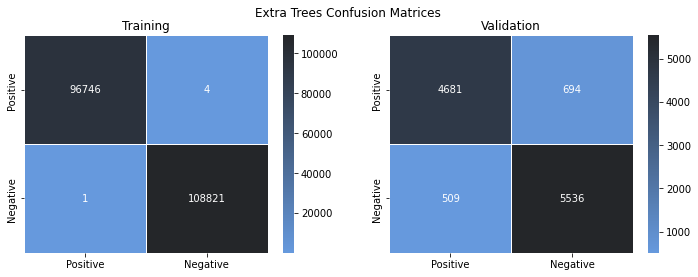

In [21]:
model_metrics('Extra Trees', y_train, y_pred_train, y_valid, y_pred, test=False)

- Bagging Classifier

In [22]:
bgc = BaggingClassifier()
bgc.fit(X_train_tfidf, y_train)

BaggingClassifier()

In [23]:
y_pred_train = bgc.predict(X_train_tfidf)
y_pred = bgc.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       0.98      0.99      0.99     96750
    positive       0.99      0.99      0.99    108822

    accuracy                           0.99    205572
   macro avg       0.99      0.99      0.99    205572
weighted avg       0.99      0.99      0.99    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.80      0.82      0.81      5375
    positive       0.84      0.81      0.83      6045

    accuracy                           0.82     11420
   macro avg       0.82      0.82      0.82     11420
weighted avg       0.82      0.82      0.82     11420
 _____________________________________________________ 

Training/Validation Difference: 17.138611625132555 



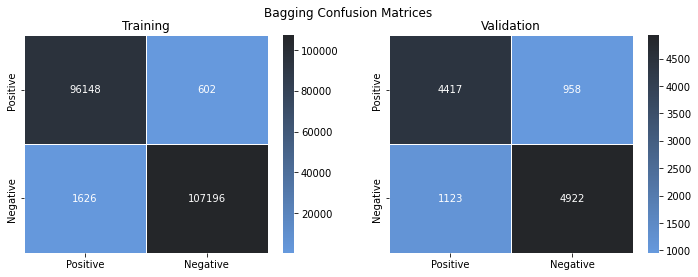

In [24]:
model_metrics('Bagging', y_train, y_pred_train, y_valid, y_pred, test=False)

- Bernoulli Naive Bayes

In [25]:
bnb = BernoulliNB()
bnb.fit(X_train_tfidf, y_train)

BernoulliNB()

In [26]:
y_pred_train = bnb.predict(X_train_tfidf)
y_pred = bnb.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       0.81      0.92      0.86     96750
    positive       0.92      0.81      0.86    108822

    accuracy                           0.86    205572
   macro avg       0.87      0.87      0.86    205572
weighted avg       0.87      0.86      0.86    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.82      0.91      0.86      5375
    positive       0.91      0.82      0.86      6045

    accuracy                           0.86     11420
   macro avg       0.86      0.86      0.86     11420
weighted avg       0.87      0.86      0.86     11420
 _____________________________________________________ 

Training/Validation Difference: 0.387054660656716 



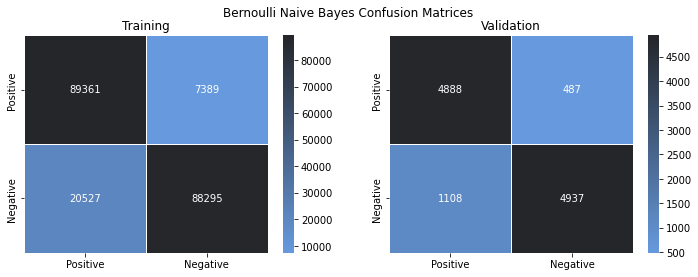

In [27]:
model_metrics('Bernoulli Naive Bayes', y_train, y_pred_train, y_valid, y_pred, test=False)

- Multinomial Naive Bayes

In [28]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [29]:
y_pred_train = mnb.predict(X_train_tfidf)
y_pred = mnb.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       0.90      0.87      0.89     96750
    positive       0.89      0.92      0.90    108822

    accuracy                           0.90    205572
   macro avg       0.90      0.89      0.89    205572
weighted avg       0.90      0.90      0.90    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.90      0.85      0.87      5375
    positive       0.87      0.91      0.89      6045

    accuracy                           0.88     11420
   macro avg       0.88      0.88      0.88     11420
weighted avg       0.88      0.88      0.88     11420
 _____________________________________________________ 

Training/Validation Difference: 1.1783688913728554 



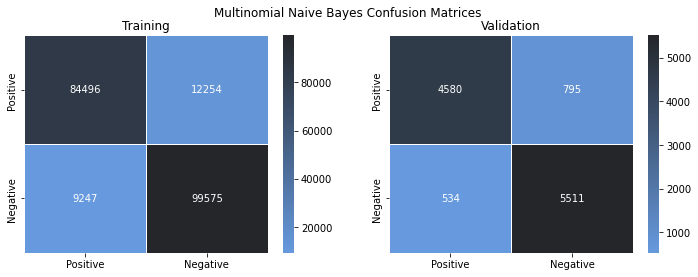

In [30]:
model_metrics('Multinomial Naive Bayes', y_train, y_pred_train, y_valid, y_pred, test=False)

#### Hyper Parameter Tuning

The model with the highest accuracy and lowest overfit is the `Logistic Regression` model.

In [58]:
param_grid = {'C': [0.1, 1, 10], 'max_iter': [550, 650, 750]}
grid_search = GridSearchCV(LogisticRegression(solver='saga'), param_grid, cv=None)
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [550, 650, 750]})

In [59]:
y_pred_train = grid_search.predict(X_train_tfidf)
y_pred = grid_search.predict(X_valid_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       0.93      0.92      0.92     96750
    positive       0.93      0.94      0.93    108822

    accuracy                           0.93    205572
   macro avg       0.93      0.93      0.93    205572
weighted avg       0.93      0.93      0.93    205572
 _____________________________________________________ 

Validation Scores:

               precision    recall  f1-score   support

    negative       0.92      0.89      0.91      5375
    positive       0.91      0.93      0.92      6045

    accuracy                           0.92     11420
   macro avg       0.92      0.91      0.91     11420
weighted avg       0.92      0.92      0.92     11420
 _____________________________________________________ 

Training/Validation Difference: 1.2365570512015154 



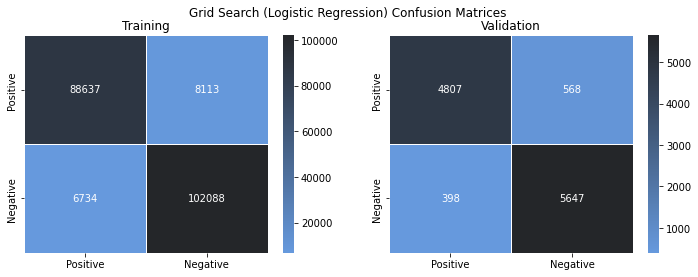

In [60]:
model_metrics('Grid Search (Logistic Regression)', y_train, y_pred_train, y_valid, y_pred)

In [61]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.706751,0.375264,0.056302,0.007689,0.1,550,"{'C': 0.1, 'max_iter': 550}",0.898845,0.897045,0.899013,0.896678,0.898623,0.898041,0.000978,7
1,5.588910,0.331200,0.053138,0.007652,0.1,650,"{'C': 0.1, 'max_iter': 650}",0.898845,0.897045,0.899013,0.896678,0.898623,0.898041,0.000978,7
2,5.835939,0.216297,0.059387,0.006255,0.1,750,"{'C': 0.1, 'max_iter': 750}",0.898845,0.897045,0.898988,0.896678,0.898623,0.898036,0.000973,9
3,6.129884,0.350386,0.053134,0.007656,1,550,"{'C': 1, 'max_iter': 550}",0.911589,0.909887,0.910833,0.910590,0.912949,0.911170,0.001043,1
4,6.128996,0.330590,0.053135,0.007655,1,650,"{'C': 1, 'max_iter': 650}",0.911541,0.909887,0.910833,0.910590,0.912949,0.911160,0.001039,2
5,5.955131,0.258410,0.062515,0.009887,1,750,"{'C': 1, 'max_iter': 750}",0.911565,0.909887,0.910809,0.910590,0.912949,0.911160,0.001043,3
6,18.304402,0.529633,0.065638,0.006254,10,550,"{'C': 10, 'max_iter': 550}",0.908476,0.910130,0.909933,0.908742,0.909350,0.909326,0.000645,6
7,17.822955,0.122699,0.059321,0.006221,10,650,"{'C': 10, 'max_iter': 650}",0.908476,0.910130,0.909933,0.908742,0.909374,0.909331,0.000645,5
8,18.526477,0.651649,0.059387,0.006253,10,750,"{'C': 10, 'max_iter': 750}",0.908476,0.910154,0.909933,0.908766,0.909398,0.909346,0.000647,4


#### Model Testing

In [41]:
X_train_valid = pd.concat([X_train, X_valid])
y_train_valid = pd.concat([y_train, y_valid])

In [42]:
X_train_valid_tfidf = tfidf.fit_transform(X_train_valid)
X_test_tfidf = tfidf.transform(X_test)

In [62]:
log_reg_final = LogisticRegression(C=1, max_iter=550, solver='saga')
log_reg_final.fit(X_train_valid_tfidf, y_train_valid)

LogisticRegression(C=1, max_iter=550, solver='saga')

In [63]:
y_pred_train = log_reg_final.predict(X_train_valid_tfidf)
y_pred = log_reg_final.predict(X_test_tfidf)

Training Scores:

               precision    recall  f1-score   support

    negative       0.93      0.92      0.92    102125
    positive       0.93      0.94      0.93    114867

    accuracy                           0.93    216992
   macro avg       0.93      0.93      0.93    216992
weighted avg       0.93      0.93      0.93    216992
 _____________________________________________________ 

Testing Scores:

               precision    recall  f1-score   support

    negative       0.92      0.90      0.91      5438
    positive       0.91      0.93      0.92      5983

    accuracy                           0.91     11421
   macro avg       0.91      0.91      0.91     11421
weighted avg       0.91      0.91      0.91     11421
 _____________________________________________________ 

Training/Testing Difference: 1.3532298784668768 



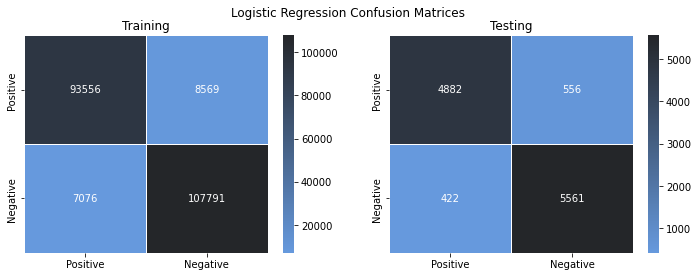

In [64]:
model_metrics('Logistic Regression', y_train_valid, y_pred_train, y_test, y_pred, test=True, save=True)